# PCA

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy
import seaborn as sns

Dummy example: gene expression from 3
          # gene over 2000 samples from 2 different tissues (numbers are purely hypotetical)

In [61]:
dummy = {'Gene1' : np.concatenate((rand.normal(0,30,1000),rand.normal(110,20,1000)),axis = None),
        'Gene2' : np.concatenate((rand.normal(10,5,1000), rand.normal(-10,2,1000)),axis=None),
        'Gene3' : np.concatenate((rand.normal(49,10,1000), rand.normal(50,20,1000)),axis=None),
        'Target' : ['A']*1000 + ['B']*1000}

In [62]:
dummy = pd.DataFrame(dummy)

Standarization of data

In [63]:
feat = ['Gene1','Gene2','Gene3']
x = dummy.loc[:,feat].values
targ = dummy.loc[:,['Target']].values
dummy_scaled = StandardScaler().fit_transform(x)

PCA

In [64]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(dummy_scaled)

principalDf = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

dummy_finale = pd.concat([principalDf,dummy[['Target']]],axis = 1)


Figure PCA

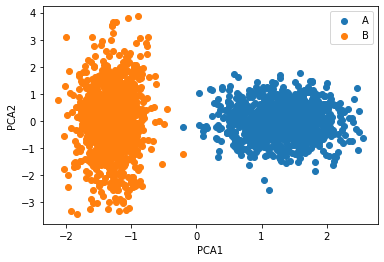

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')

for tar in ['A','B']:
    #print(tar)
    ax.scatter(data = dummy_finale[dummy_finale['Target'] == tar], x='principal component 1', y = 'principal component 2')

ax.legend(['A','B'])

In [67]:
pca.explained_variance_ratio_

array([0.61687577, 0.33334621])

# k-means

In [80]:
dummy_k = principalDf

In [106]:
km = KMeans(n_clusters= 2).fit(dummy_k)
y_km = km.predict(dummy_k)

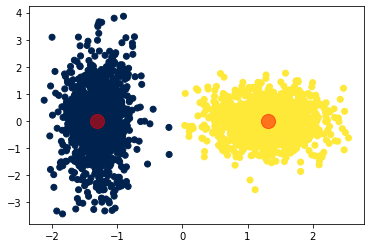

In [107]:
plt.scatter(data = dummy_k,x='principal component 1', y = 'principal component 2', c = y_km, cmap = 'cividis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Heatmap

In [91]:
dist = scipy.spatial.distance_matrix(dummy_k.values,dummy_k.values)

/home/allen/miniconda3/envs/lorenzo_py/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/allen/miniconda3/envs/lorenzo_py/lib/python3.7/site-packages/seaborn/matrix.py:630: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


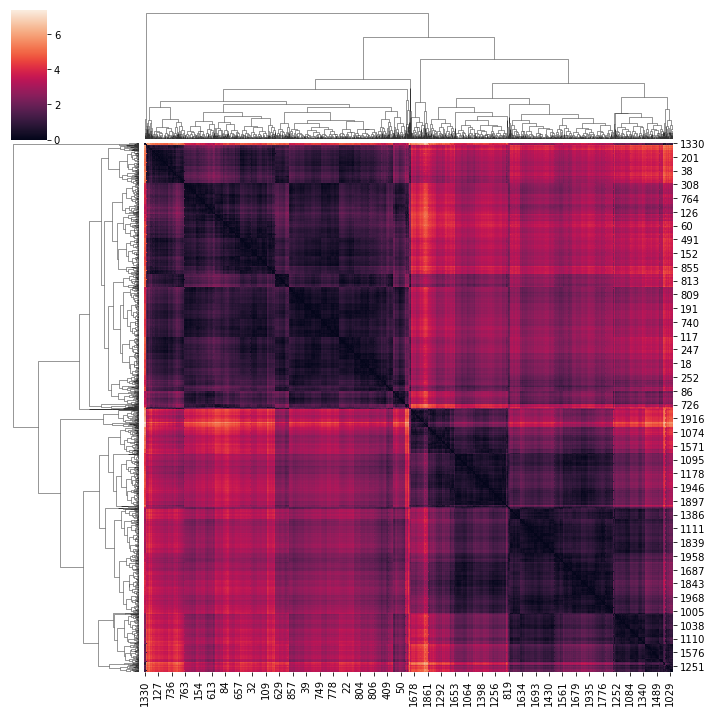

In [94]:
sns.clustermap(dist,)

# Chisquare.test

Dummy dataset for comparison between smoker status and respiratory complications

In [96]:
dummy_c = {'Complications' : ['Yes']*50 + ['No']*50,
          'Smoker' : ['Current']*40 + ['Never']*60 }

dummy_c = pd.DataFrame(dummy_c)

In [167]:
dummy_c_cross = pd.crosstab(dummy_c.Smoker, dummy_c.Complications)
p = scipy.stats.chi2_contingency(dummy_c_cross)[1]

Text(0, 0.5, '%')

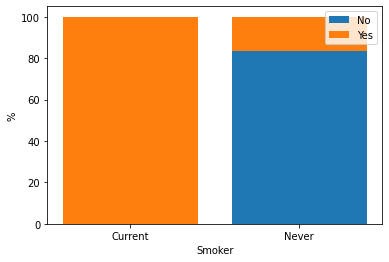

In [166]:
dummy_c_cross_p = dummy_c_cross.apply(lambda r: 100*r/r.sum(), axis=1)

fig , ax = plt.subplots(1,1)

r = dummy_c_cross_p.index.values
bottom = 0
for tar in dummy_c_cross_p.columns:
    ax.bar(x = r, height = dummy_c_cross_p[tar], bottom = bottom)
    bottom = dummy_c_cross_p[tar]
    
ax.legend(dummy_c_cross_p.columns)
ax.set_xlabel('Smoker')
ax.set_ylabel('%')